In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [103]:
df_train.shape

(614, 13)

In [104]:
df_test.shape

(367, 12)

In [105]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Missing Value check

In [106]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


## Filling of missing values

In [107]:
df_train['Gender'] = df_train['Gender'].fillna( 
                               df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna( 
                               df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna( 
                               df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna( 
                               df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna( 
                               df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna( 
                               df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(
                               df_train['Credit_History'].dropna().mode().values[0] )


df_test['Gender'] = df_test['Gender'].fillna( 
                               df_test['Gender'].dropna().mode().values[0] )
df_test['Married'] = df_test['Married'].fillna( 
                               df_test['Married'].dropna().mode().values[0] )
df_test['Dependents'] = df_test['Dependents'].fillna( 
                               df_test['Dependents'].dropna().mode().values[0] )
df_test['Self_Employed'] = df_test['Self_Employed'].fillna( 
                               df_test['Self_Employed'].dropna().mode().values[0] )
df_test['LoanAmount'] = df_test['LoanAmount'].fillna( 
                               df_test['LoanAmount'].dropna().median() )
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna( 
                               df_test['Loan_Amount_Term'].dropna().mode().values[0] )
df_test['Credit_History'] = df_test['Credit_History'].fillna(
                               df_test['Credit_History'].dropna().mode().values[0] )

In [108]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [109]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [110]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


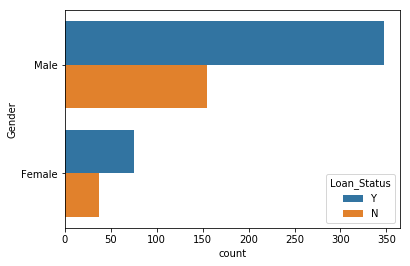

In [111]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = df_train)
#sns.countplot(y = 'Married', hue = 'Loan_Status', data = df_train)

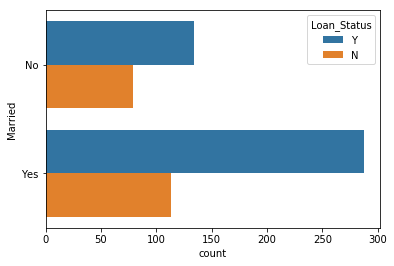

In [112]:
sns.countplot(y = 'Married', hue = 'Loan_Status', data = df_train)


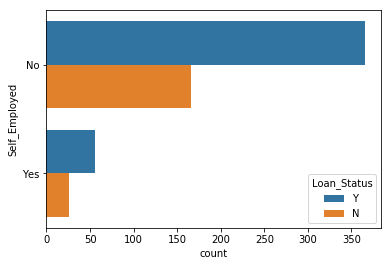

In [113]:
sns.countplot(y = 'Self_Employed', hue = 'Loan_Status', data = df_train)

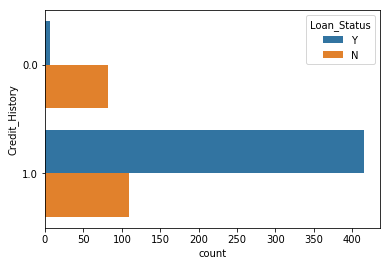

In [114]:
sns.countplot(y = 'Credit_History', hue = 'Loan_Status', data = df_train)

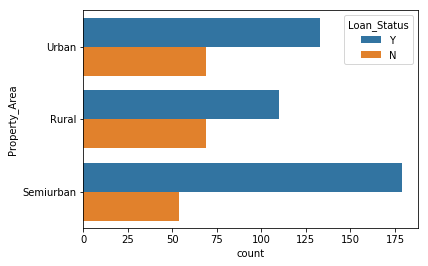

In [115]:
sns.countplot(y = 'Property_Area', hue = 'Loan_Status', data = df_train)

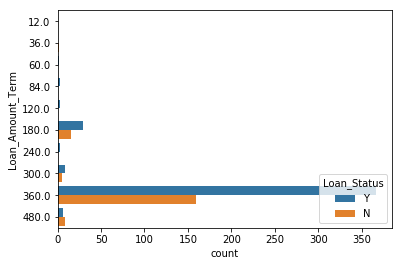

In [116]:
sns.countplot(y = 'Loan_Amount_Term', hue = 'Loan_Status', data = df_train)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


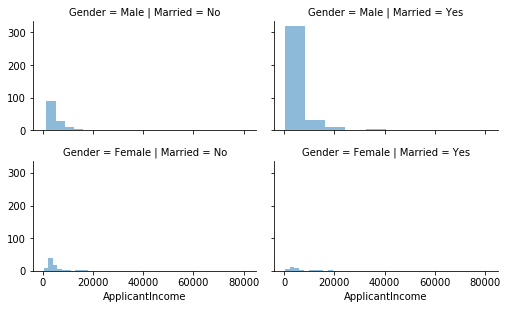

In [117]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


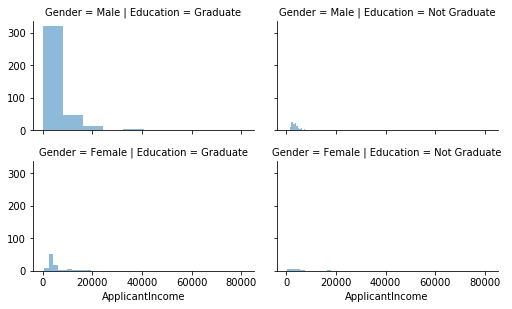

In [118]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


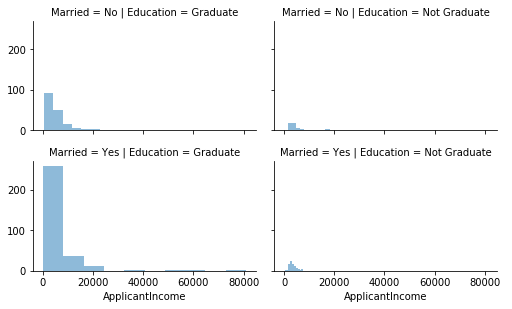

In [119]:
grid = sns.FacetGrid(df_train, row='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


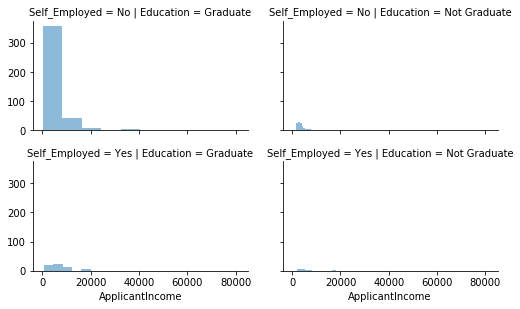

In [120]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [121]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


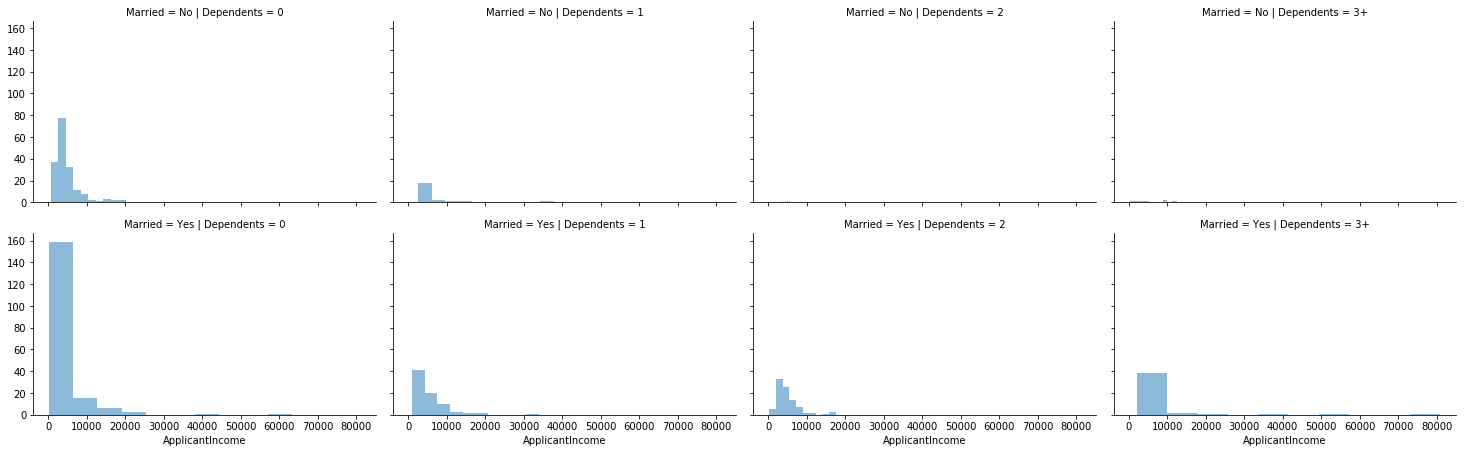

In [122]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


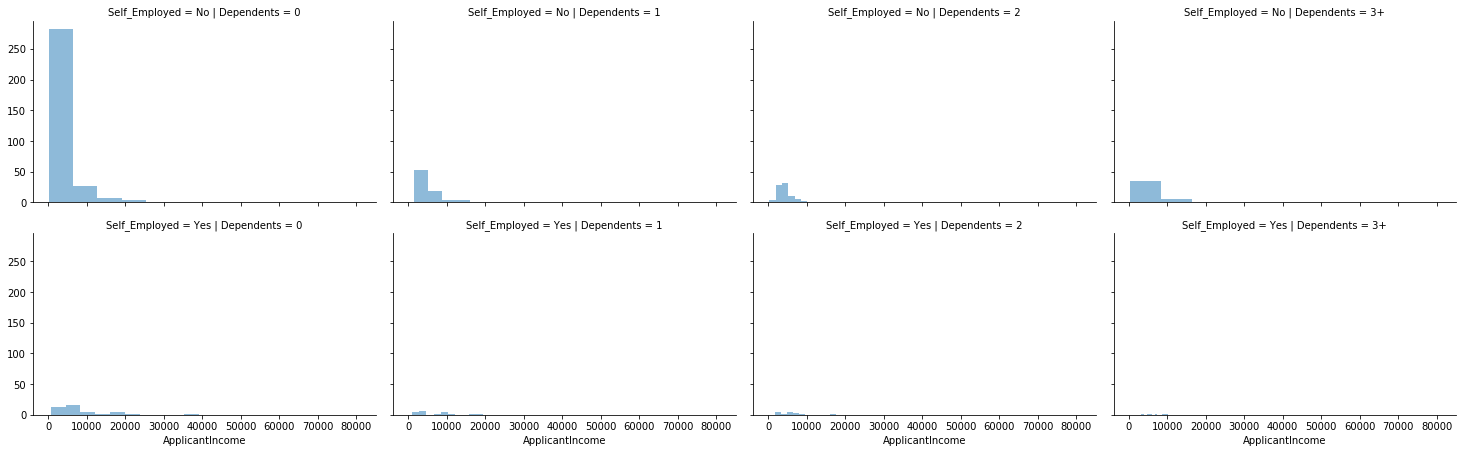

In [123]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


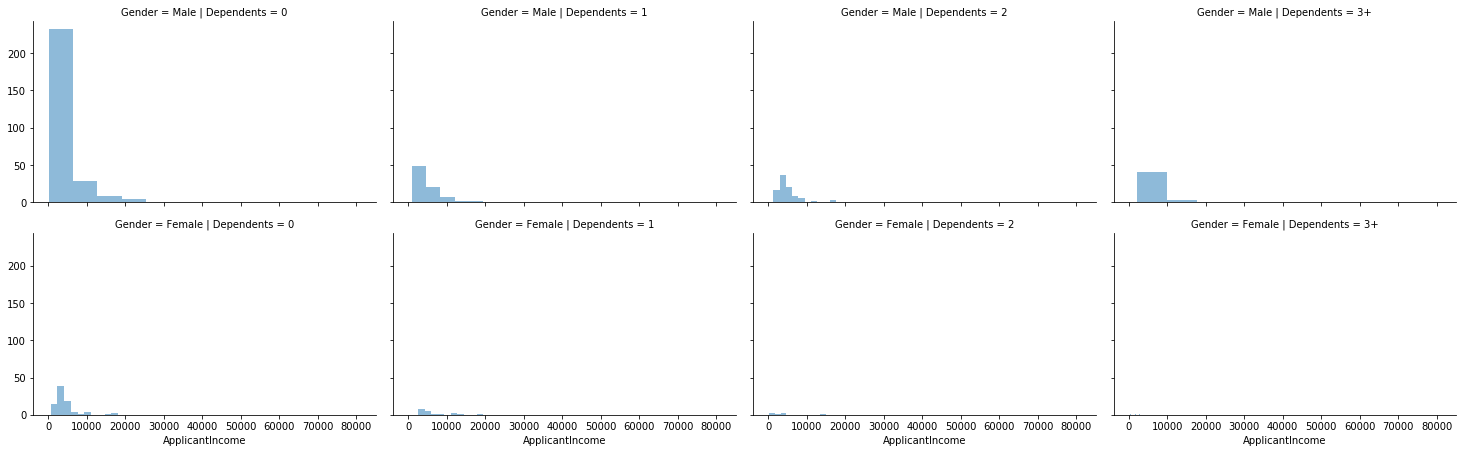

In [124]:
grid = sns.FacetGrid(df_train, row='Gender', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


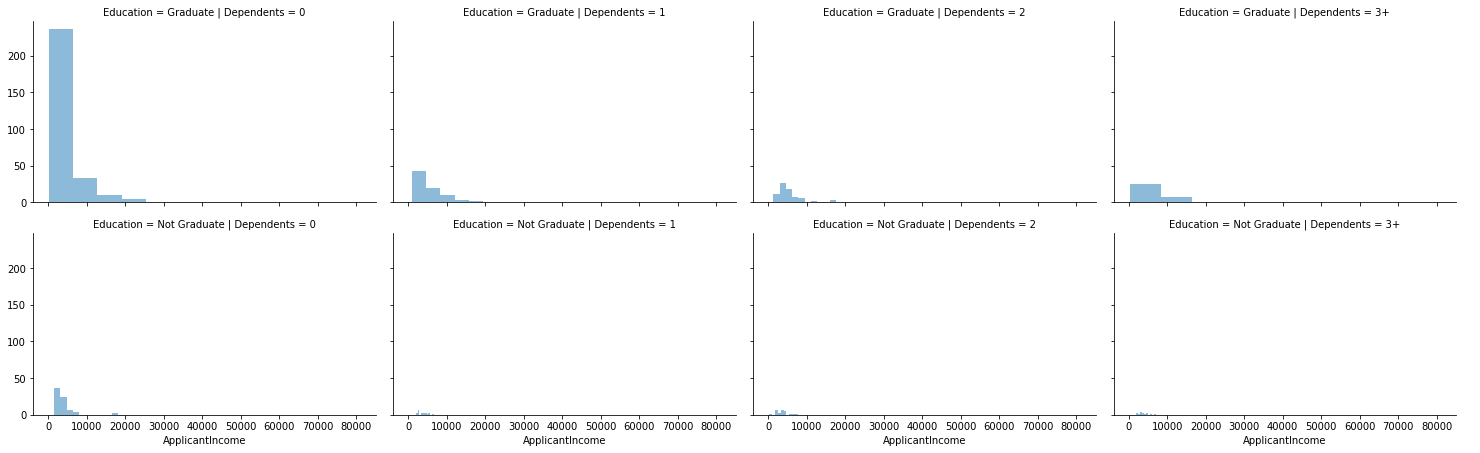

In [125]:
grid = sns.FacetGrid(df_train, row='Education', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


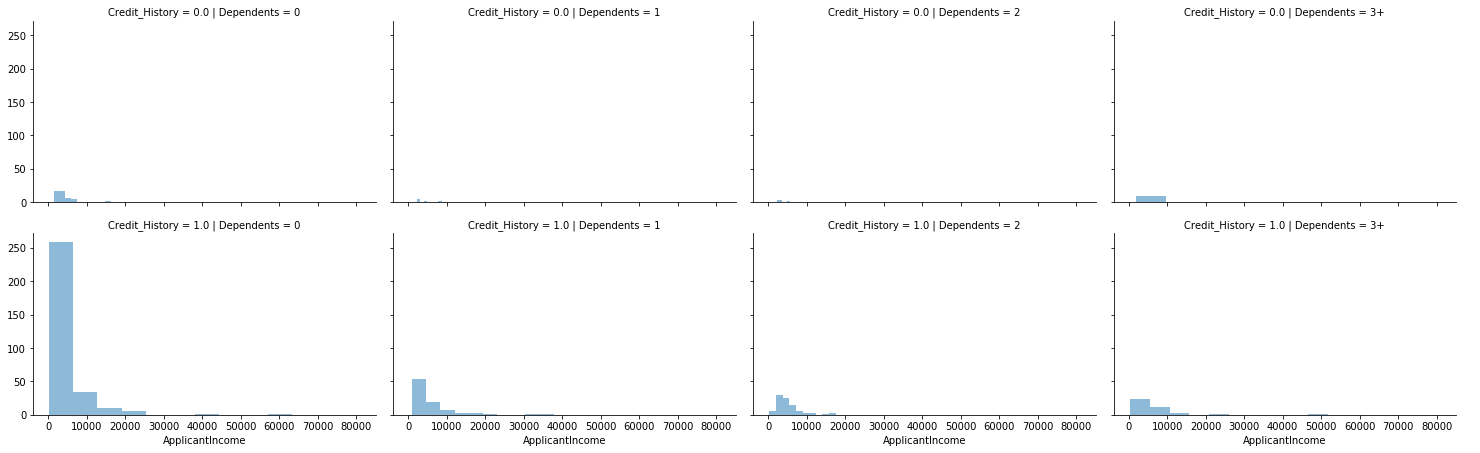

In [126]:
grid = sns.FacetGrid(df_train, row='Credit_History', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [127]:
df_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


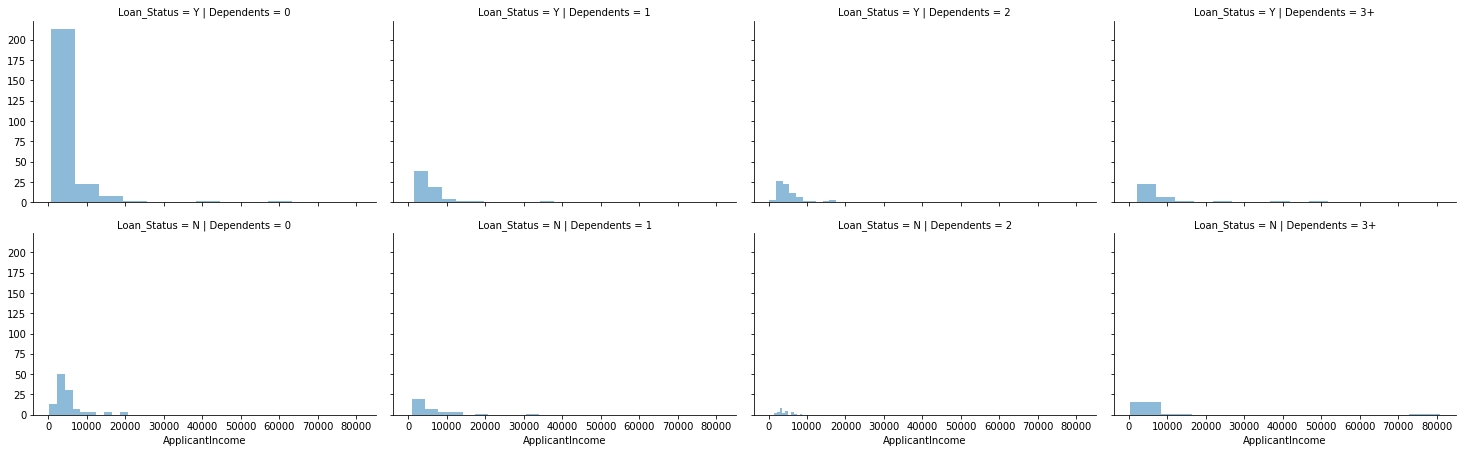

In [128]:
grid = sns.FacetGrid(df_train, row='Loan_Status', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


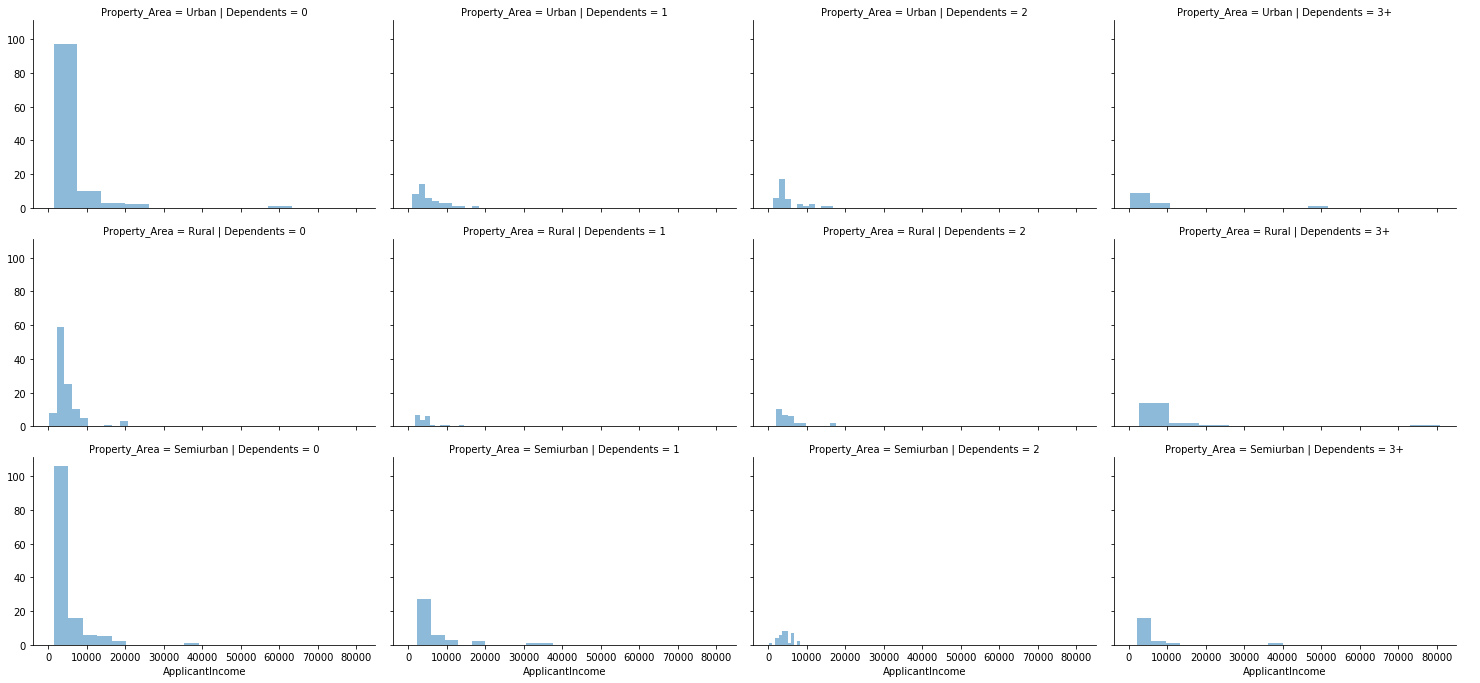

In [129]:
grid = sns.FacetGrid(df_train, row='Property_Area', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


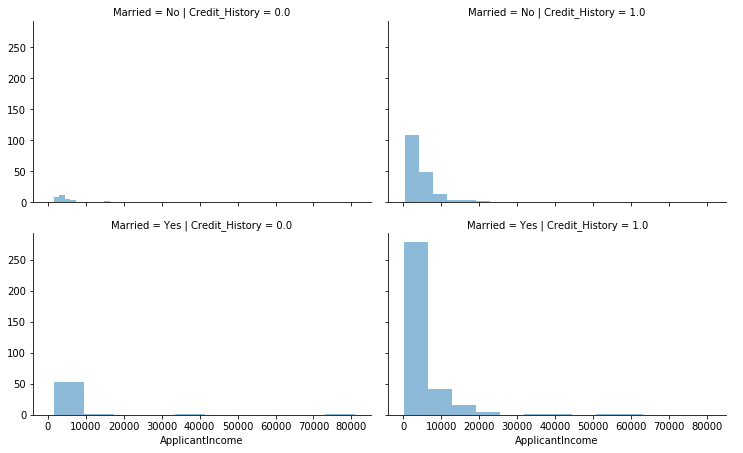

In [130]:
grid = sns.FacetGrid(df_train, row='Married', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


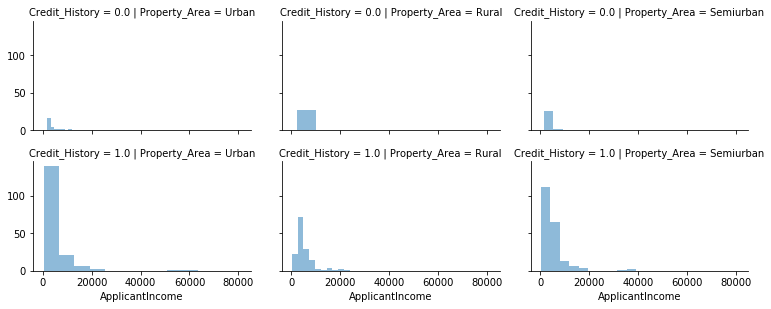

In [131]:
grid = sns.FacetGrid(df_train, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


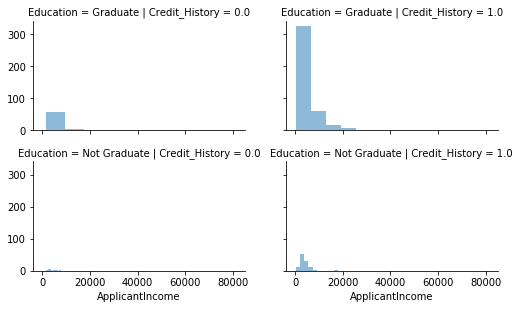

In [132]:
grid = sns.FacetGrid(df_train, row='Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


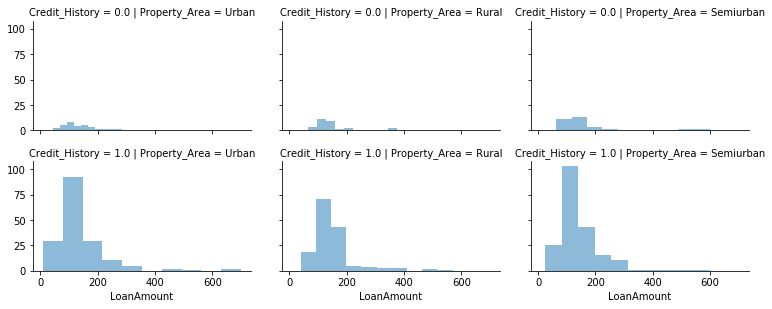

In [133]:
grid = sns.FacetGrid(df_train, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=10)
grid.add_legend()

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

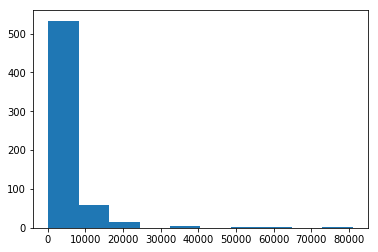

In [134]:
income = df_train['ApplicantIncome']
plt.hist(income)


(array([  2.,   1.,   2.,  23., 231., 243.,  75.,  29.,   5.,   3.]),
 array([ 5.01063529,  5.63979221,  6.26894912,  6.89810604,  7.52726295,
         8.15641986,  8.78557678,  9.41473369, 10.04389061, 10.67304752,
        11.30220443]),
 <a list of 10 Patch objects>)

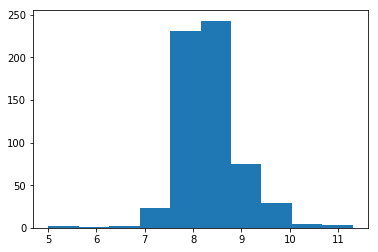

In [135]:
income = df_train['ApplicantIncome']
plt.hist(np.log(income))


(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <a list of 10 Patch objects>)

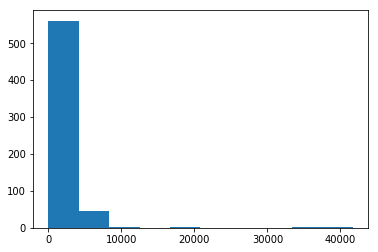

In [136]:
plt.hist(df_train.CoapplicantIncome)

In [137]:
#plt.hist(np.log(df_train.CoapplicantIncome))

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

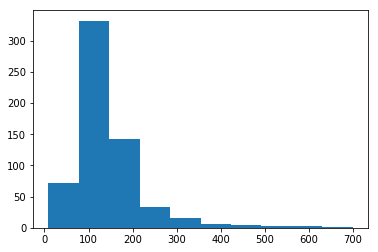

In [138]:
plt.hist(df_train.LoanAmount)

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <a list of 10 Patch objects>)

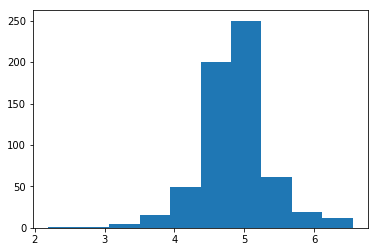

In [139]:
plt.hist(np.log(df_train.LoanAmount))

{'whiskers': [<matplotlib.lines.Line2D at 0x465ab93c88>,
 'caps': [<matplotlib.lines.Line2D at 0x465ab9c668>,
 'boxes': [<matplotlib.lines.Line2D at 0x465ab93b38>],
 'medians': [<matplotlib.lines.Line2D at 0x465ab9cef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x465aba4390>],
 'means': []}

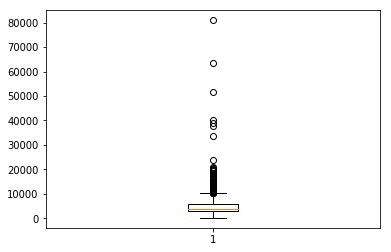

In [140]:
plt.boxplot(df_train.ApplicantIncome)


{'whiskers': [<matplotlib.lines.Line2D at 0x465abfc128>,
 'caps': [<matplotlib.lines.Line2D at 0x465abfc9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x465abf0f98>],
 'medians': [<matplotlib.lines.Line2D at 0x465ac04278>],
 'fliers': [<matplotlib.lines.Line2D at 0x465ac04630>],
 'means': []}

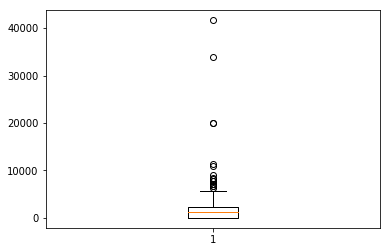

In [141]:
plt.boxplot(df_train.CoapplicantIncome)

In [142]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
code_numeric = {'Male': 1, 'Female': 2,
                'Yes': 1, 'No': 2,
                'Graduate': 1, 'Not Graduate': 2,
                'Urban': 3, 'Semiurban': 2,'Rural': 1,
                'Y': 1, 'N': 0,
                '3+': 3}

In [144]:
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)


In [145]:
#drop the uniques loan id
df_train.drop('Loan_ID', axis = 1, inplace = True)

In [146]:
df_test.drop('Loan_ID', axis = 1, inplace = True)

In [147]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [149]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [150]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null object
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 31.7+ KB


In [151]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)



In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               367 non-null int64
Married              367 non-null int64
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
Dependents           367 non-null int64
dtypes: float64(3), int64(8)
memory usage: 31.7 KB


In [153]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Dependents           614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


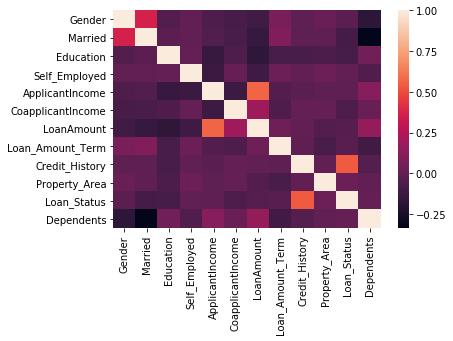

In [154]:
sns.heatmap(df_train.corr())

In [155]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [173]:
model = LogisticRegression()

In [174]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
ypred = model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [178]:
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

### Using Decision Tree

In [162]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [163]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

[0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 1 1 1 0 0 0 1 1 0 1 0 0]


In [164]:
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

0.7745664739884394

### Using Random Forest Classifier

In [165]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [166]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [167]:
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.8540540540540541

### Using Catboost

In [168]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [50, 100, 300]
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    
    # Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
    
print("\n ========================================================")



0:	learn: 0.6687028	total: 14.4ms	remaining: 1.42s
1:	learn: 0.6432550	total: 27.2ms	remaining: 1.33s
2:	learn: 0.6222569	total: 38.3ms	remaining: 1.24s
3:	learn: 0.6035111	total: 53.8ms	remaining: 1.29s
4:	learn: 0.5849230	total: 67.1ms	remaining: 1.27s
5:	learn: 0.5719449	total: 79.3ms	remaining: 1.24s
6:	learn: 0.5592571	total: 89.3ms	remaining: 1.19s
7:	learn: 0.5480464	total: 99.5ms	remaining: 1.14s
8:	learn: 0.5360571	total: 105ms	remaining: 1.06s
9:	learn: 0.5280855	total: 115ms	remaining: 1.04s
10:	learn: 0.5189235	total: 126ms	remaining: 1.02s
11:	learn: 0.5121510	total: 137ms	remaining: 1.01s
12:	learn: 0.5043888	total: 144ms	remaining: 967ms
13:	learn: 0.4980724	total: 156ms	remaining: 958ms
14:	learn: 0.4930671	total: 166ms	remaining: 942ms
15:	learn: 0.4875382	total: 177ms	remaining: 927ms
16:	learn: 0.4829266	total: 188ms	remaining: 916ms
17:	learn: 0.4786739	total: 198ms	remaining: 901ms
18:	learn: 0.4748216	total: 209ms	remaining: 891ms
19:	learn: 0.4706979	total: 221ms

In [169]:
model=CatBoostClassifier(depth = 6, iterations= 100, learning_rate= 0.1)
model.fit(X_train, y_train,
       eval_set=(X_test, y_test),plot=False)

0:	learn: 0.6687028	test: 0.6682404	best: 0.6682404 (0)	total: 11.2ms	remaining: 1.11s
1:	learn: 0.6432550	test: 0.6420105	best: 0.6420105 (1)	total: 21.6ms	remaining: 1.06s
2:	learn: 0.6222569	test: 0.6218432	best: 0.6218432 (2)	total: 32.2ms	remaining: 1.04s
3:	learn: 0.6035111	test: 0.6026921	best: 0.6026921 (3)	total: 42.8ms	remaining: 1.03s
4:	learn: 0.5849230	test: 0.5821261	best: 0.5821261 (4)	total: 50ms	remaining: 951ms
5:	learn: 0.5719449	test: 0.5673022	best: 0.5673022 (5)	total: 61.8ms	remaining: 969ms
6:	learn: 0.5592571	test: 0.5562131	best: 0.5562131 (6)	total: 74.3ms	remaining: 988ms
7:	learn: 0.5480464	test: 0.5473378	best: 0.5473378 (7)	total: 86ms	remaining: 989ms
8:	learn: 0.5360571	test: 0.5339422	best: 0.5339422 (8)	total: 91.9ms	remaining: 929ms
9:	learn: 0.5280855	test: 0.5252966	best: 0.5252966 (9)	total: 105ms	remaining: 947ms
10:	learn: 0.5189235	test: 0.5168247	best: 0.5168247 (10)	total: 117ms	remaining: 944ms
11:	learn: 0.5121510	test: 0.5096730	best: 0.50

99:	learn: 0.3465575	test: 0.4479658	best: 0.4477105 (98)	total: 1.09s	remaining: 0us

bestTest = 0.4477105009
bestIteration = 98

Shrink model to first 99 iterations.


In [170]:
train_score = model.score(X_train, y_train) # train (learn) score

val_score = model.score(X_test, y_test) # val (test) score
print('The training or learning score is', train_score)
print('The evaluation score is', val_score)

The training or learning score is 0.8411405295315683
The evaluation score is 0.8130081300813008
